### Revenue Forecasting-Trend Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from pandas import to_datetime
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
import warnings; 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("fake_clinic_data_extract_test.csv")
df.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00


### Understanding the Data Types and Entries

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   appointment_date           4071 non-null   object 
 1   clinic_name                4071 non-null   object 
 2   patient_id                 4071 non-null   int64  
 3   practitioner_id            4071 non-null   int64  
 4   appointment_duration_min   4071 non-null   int64  
 5   revenues_from_appointment  3696 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 191.0+ KB


In [4]:
df.describe()

,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
count,4071.000000,4071.000000,4071.000000,3696.000000
mean,50352.166789,766.627364,42.246377,160.864115
std,7371.897408,64.550564,28.539519,245.706333
min,42127.000000,741.000000,15.000000,33.540000
25%,44646.000000,742.000000,30.000000,72.160000
50%,47388.000000,755.000000,30.000000,104.470000
75%,53373.000000,756.000000,60.000000,161.630000
max,70307.000000,1030.000000,330.000000,5655.920000


In [5]:
df.shape

(4071, 6)

In [6]:
df.groupby(["clinic_name", "appointment_date"]).agg({"revenues_from_appointment":"mean","patient_id":"count"})

revenues_from_appointment  patient_id
clinic_name appointment_date                                       
clinic_1    2021-07-07                       130.475000           4
            2021-07-08                       150.174286           8
            2021-07-09                       101.121429           7
            2021-07-12                       178.963158          20
            2021-07-13                       111.310000          12
...                                                 ...         ...
clinic_2    2021-12-23                       197.284118          17
            2021-12-27                       140.678182          12
            2021-12-28                       145.580000          14
            2021-12-29                       140.366923          14
            2021-12-30                       109.973750          11

[251 rows x 2 columns]

### Note:
#### For Prediction of revenue the time-line and the Revenue are the point of focus so i am seperating only two focused colums for our further work . I am Replacing all Null values with 0 to overcome outliers. 

In [7]:
df = df.loc[:,('appointment_date', 'revenues_from_appointment')].fillna(0) # Replacing Null values with 0 to overcome outliers issue
#pd.set_option("max_rows", None)
df.head()

,appointment_date,revenues_from_appointment
0,2021-12-30,98.13
1,2021-12-29,65.13
2,2021-12-29,105.18
3,2021-12-27,58.11
4,2021-12-23,119.00


#### Here i am using fbprophet module which is a strong module to predict future trend to make it simple and based on that the model data frame has to be always having colums 'ds' and 'y' to fit in the model. so i have renamed the colums accordingly and tried to see the learning trend of the data .

             ds       y
4054 2021-07-02  103.32
4055 2021-07-07    0.00
4056 2021-07-07   64.37
4057 2021-07-05  104.68
4058 2021-07-22  211.09


INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 63.340


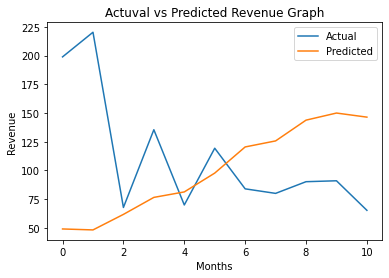

In [8]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 12):
	date = '2021-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-11:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.title('Actuval vs Predicted Revenue Graph')
plt.xlabel('Months')
plt.ylabel('Revenue')
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

## Conclusion:
### I have performed revenue prediction-Trend Analysis and tried to plot the graph. I have observed here that my model is predecting the future revenue as i thought. Becuase prediction graph until 2022 shows that the average value of the revenue for next months.  its performing better becuase the mean is almost same for the trained data.